Saving archive (3).zip to archive (3).zip
Extracted files: ['StudentsPerformance.csv']
✅ Dataset loaded successfully!
Shape: (1000, 8)
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
Train/Val/Test shapes: (700, 5) (150, 5) (150, 5)


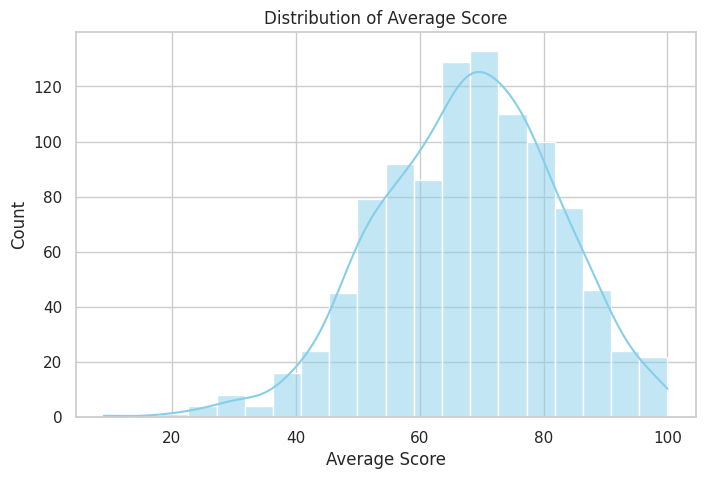

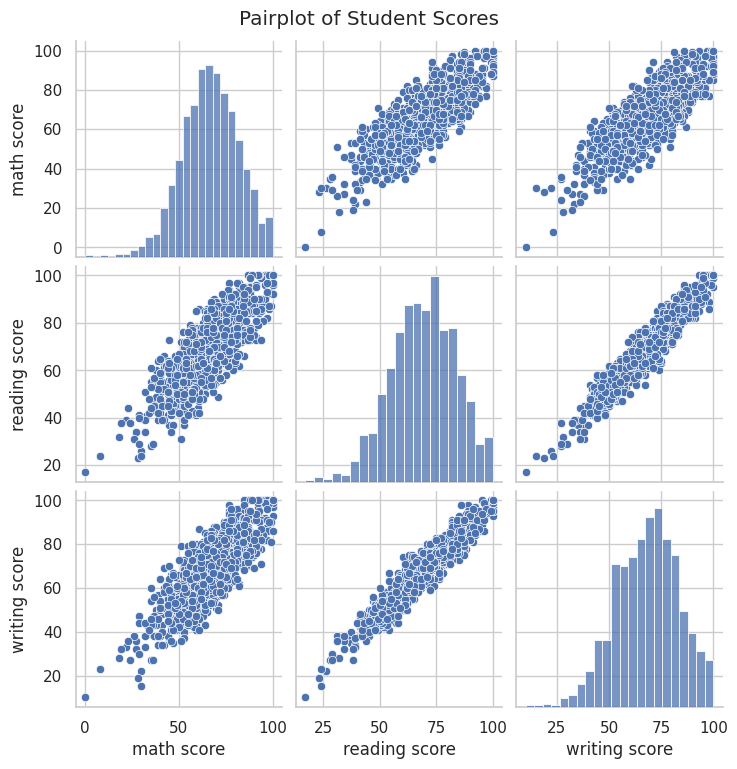

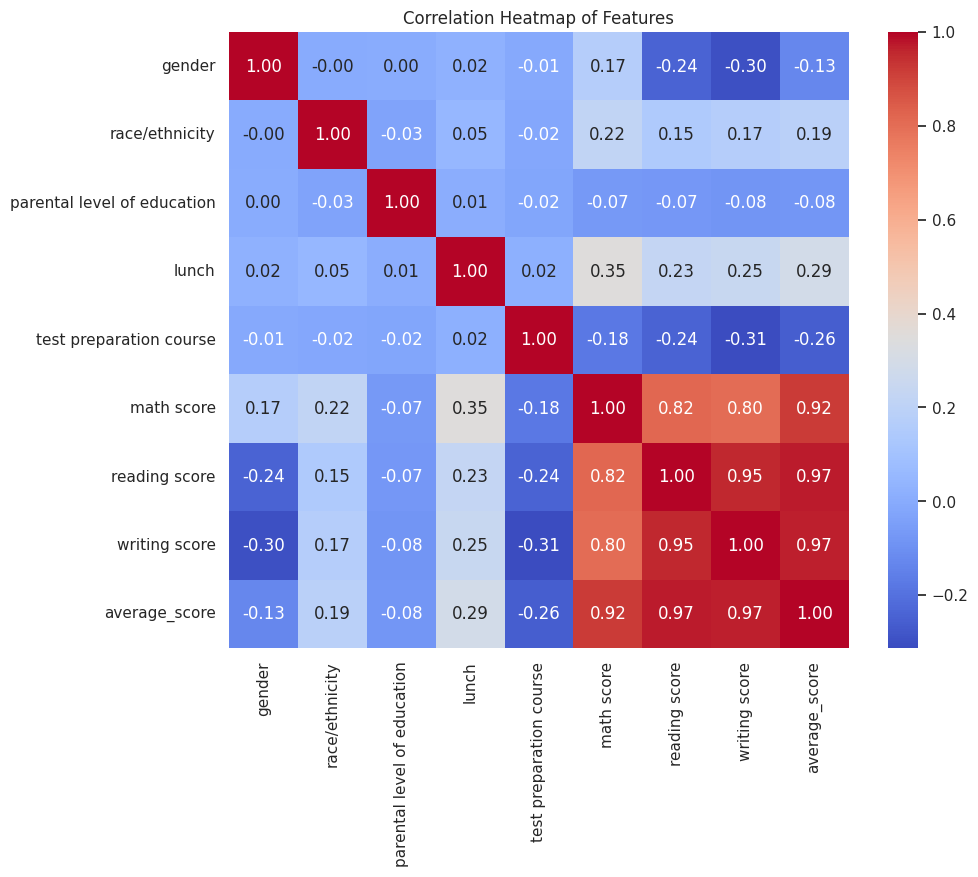

/tmp/ipython-input-2002702227.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='average_score', data=df, palette='pastel')


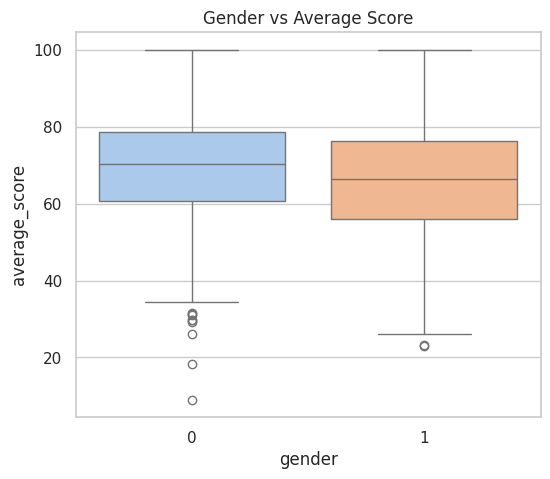

/tmp/ipython-input-2002702227.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y='average_score', data=df, palette='muted')


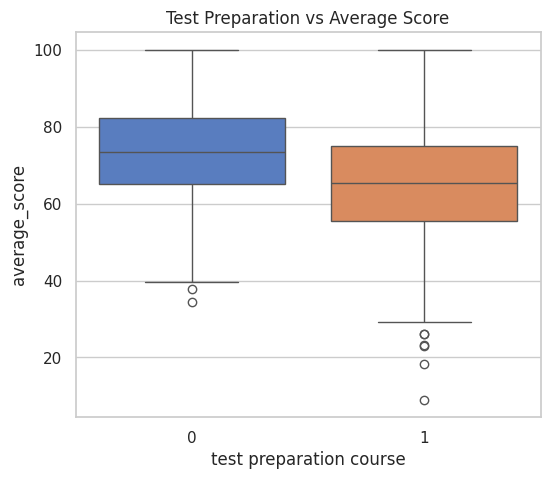

/tmp/ipython-input-2002702227.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental level of education', y='average_score', data=df, palette='viridis')


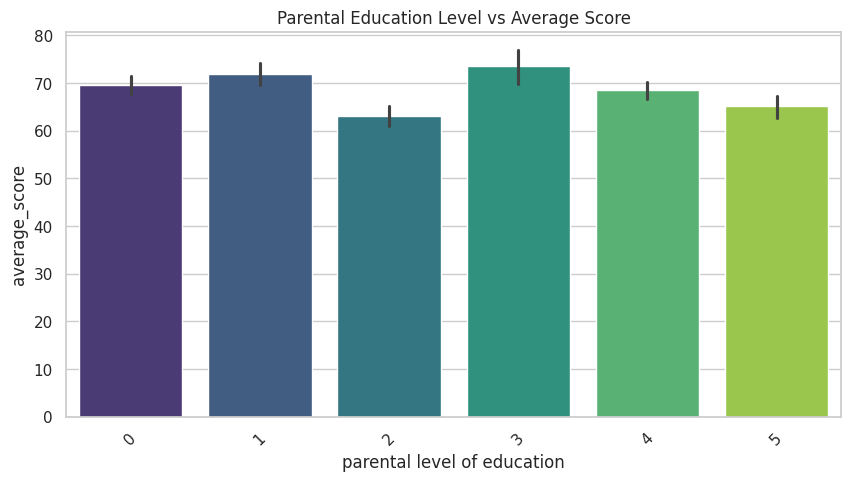

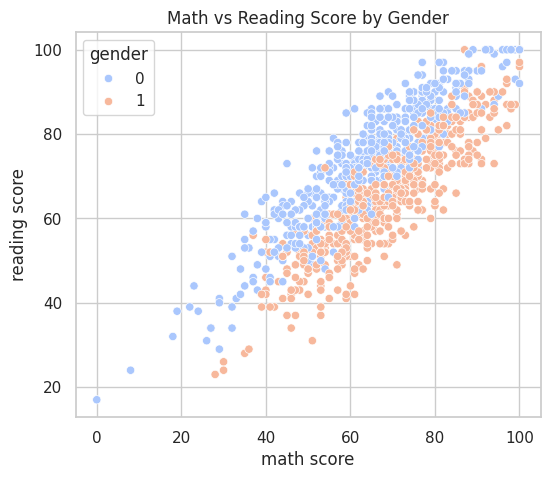

RF MSE: 189.98900626942677
RF MAE: 11.438897483233028
RF R2: -0.0035180270583135


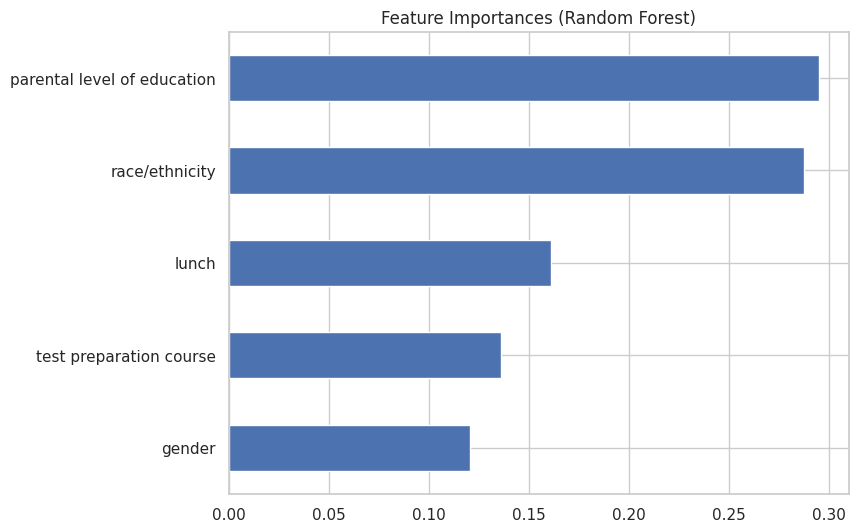

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4901.9722 - mae: 68.6359 - val_loss: 4410.1826 - val_mae: 64.3853
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4398.2305 - mae: 64.8993 - val_loss: 3922.1829 - val_mae: 60.4589
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3879.6296 - mae: 60.6965 - val_loss: 3096.7905 - val_mae: 53.2652
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2954.9766 - mae: 52.5285 - val_loss: 1984.4003 - val_mae: 41.7994
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1713.3895 - mae: 39.0495 - val_loss: 891.0547 - val_mae: 26.8055
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 679.4694 - mae: 22.8962 - val_loss: 319.4463 - val_mae: 14.9619
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 240.0974 - mae: 12.7978 - val_loss: 246.3036 - val_mae: 12.0252
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 201.1535 - mae: 11.3330 - val_loss: 241.2004 - val_mae: 11.8385
Epoch 9/50
22

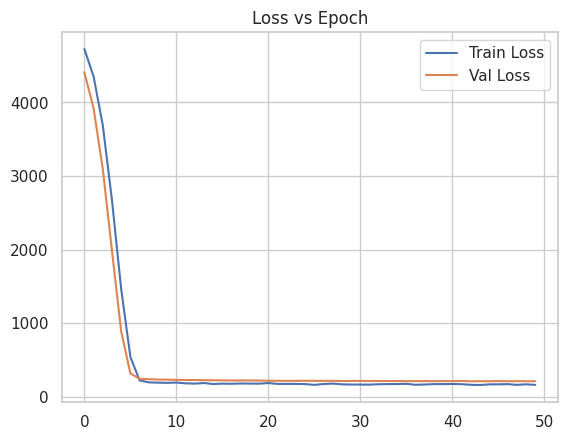

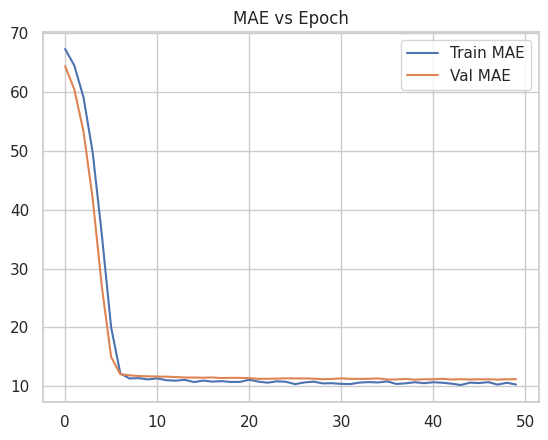

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


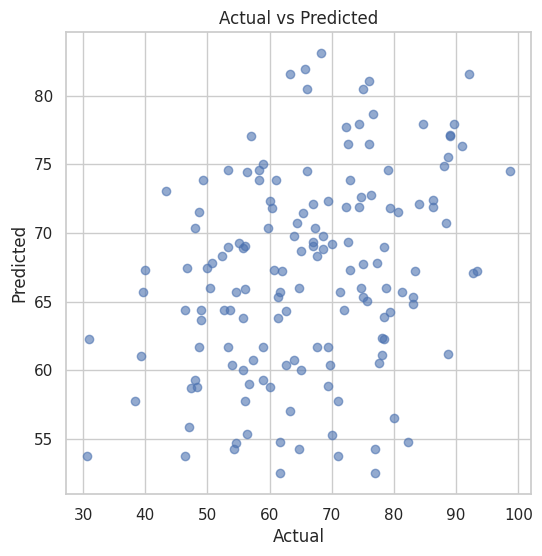

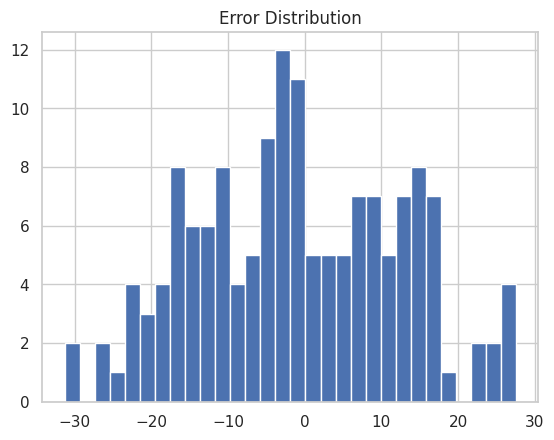

In [ ]:
# ============================
# Student Performance Project
# ============================

# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras import layers, models
import joblib
from google.colab import files
import zipfile

sns.set(style='whitegrid')

# Step 2: Upload dataset
uploaded = files.upload()  # Colab file upload
zip_path = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()
    print("Extracted files:", zip_ref.namelist())

# Step 3: Load dataset
df = pd.read_csv('StudentsPerformance.csv')
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.columns)
df.head()

# Step 4: Preprocessing
df.columns = df.columns.str.strip()
df['average_score'] = df[['math score','reading score','writing score']].mean(axis=1)

# Encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for c in cat_cols:
    df[c] = le.fit_transform(df[c])

# Features and target
X = df.drop(['math score','reading score','writing score','average_score'], axis=1)
y = df['average_score']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)
print('Train/Val/Test shapes:', X_train.shape, X_val.shape, X_test.shape)

# ============================
# Step 5: Data Visualization
# ============================

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['average_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Score')
plt.xlabel('Average Score'); plt.ylabel('Count')
plt.show()

# Pairplot
sns.pairplot(df[['math score','reading score','writing score']])
plt.suptitle('Pairplot of Student Scores', y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

# Boxplot: Gender vs Average Score
plt.figure(figsize=(6,5))
sns.boxplot(x='gender', y='average_score', data=df, palette='pastel')
plt.title('Gender vs Average Score')
plt.show()

# Boxplot: Test Preparation vs Average Score
plt.figure(figsize=(6,5))
sns.boxplot(x='test preparation course', y='average_score', data=df, palette='muted')
plt.title('Test Preparation vs Average Score')
plt.show()

# Barplot: Parental Education vs Average Score
plt.figure(figsize=(10,5))
sns.barplot(x='parental level of education', y='average_score', data=df, palette='viridis')
plt.title('Parental Education Level vs Average Score')
plt.xticks(rotation=45)
plt.show()

# Scatterplot: Math vs Reading
plt.figure(figsize=(6,5))
sns.scatterplot(x='math score', y='reading score', data=df, hue='gender', palette='coolwarm')
plt.title('Math vs Reading Score by Gender')
plt.show()

# ============================
# Step 6: Baseline Model - Random Forest
# ============================
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print('RF MSE:', mean_squared_error(y_test, y_pred_rf))
print('RF MAE:', mean_absolute_error(y_test, y_pred_rf))
print('RF R2:', r2_score(y_test, y_pred_rf))

# Feature importance
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
fi.plot(kind='barh', figsize=(8,6))
plt.title('Feature Importances (Random Forest)')
plt.show()

# ============================
# Step 7: Deep Learning Model (MLP)
# ============================

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# ============================
# Step 8: Evaluation & Visualizations
# ============================

# Loss vs Epoch
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss vs Epoch'); plt.show()

# MAE vs Epoch
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend(); plt.title('MAE vs Epoch'); plt.show()

# Predictions
y_pred = model.predict(X_test)

# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual'); plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Error distribution
residuals = y_test - y_pred.flatten()
plt.hist(residuals, bins=30)
plt.title('Error Distribution')
plt.show()

# ============================
# Step 9: Save Model and Scaler
# ============================
model.save('student_mlp_model.h5')
joblib.dump(scaler, 'scaler.save')
df.to_csv('StudentsPerformance_cleaned.csv', index=False)


# New Section

In [ ]:
# Step 3: Load dataset
df = pd.read_csv('StudentsPerformance.csv')
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.columns)
df.head()

✅ Dataset loaded successfully!
Shape: (1000, 8)
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['average_score'] = df[['math score','reading score','writing score']].mean(axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for c in cat_cols:
   df[c] = le.fit_transform(df[c])


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


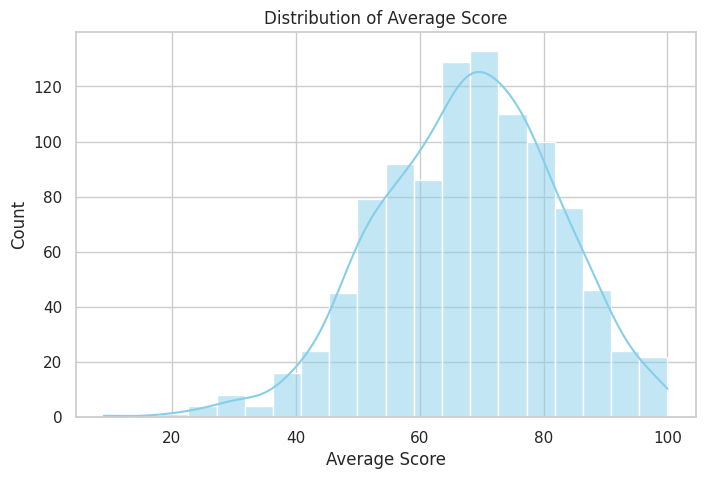

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['average_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Score')
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.show()


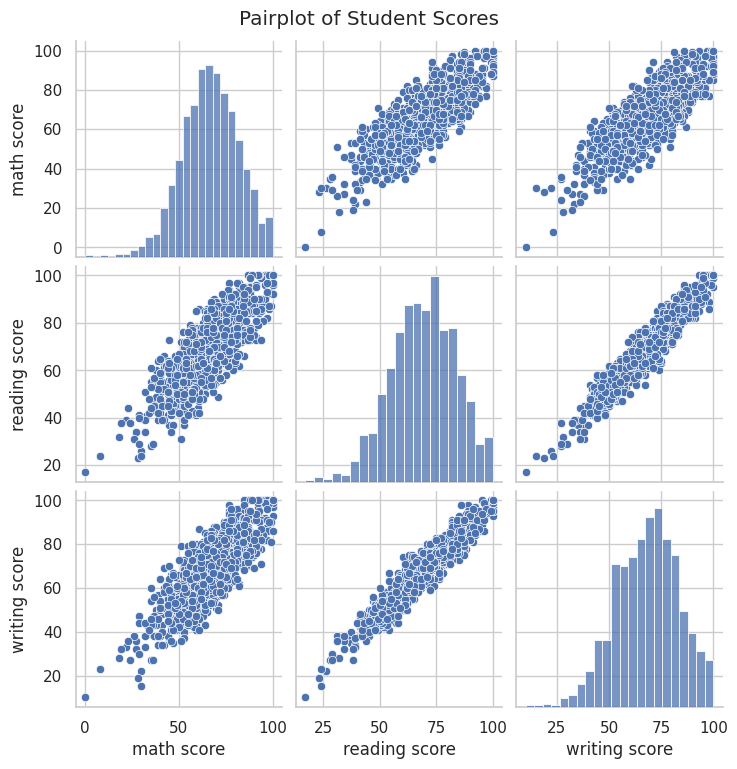

In [ ]:
sns.pairplot(df[['math score','reading score','writing score']])
plt.suptitle('Pairplot of Student Scores', y=1.02)
plt.show()


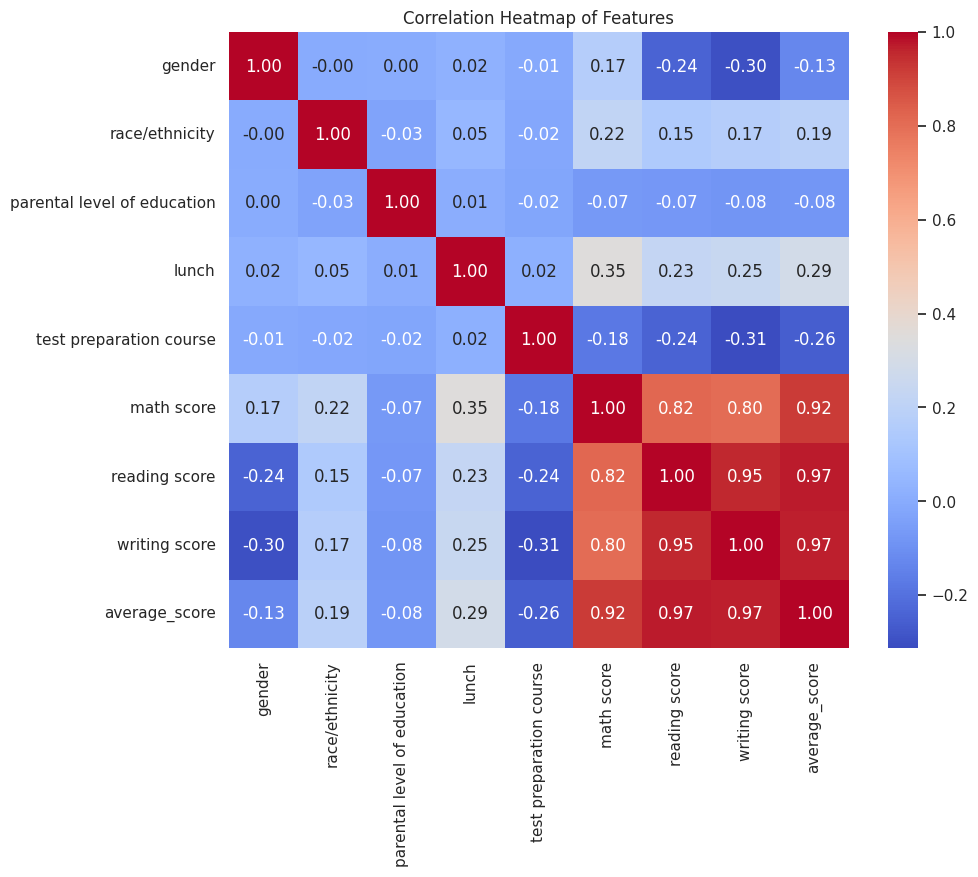

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


/tmp/ipython-input-453953407.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='average_score', data=df, palette='pastel')


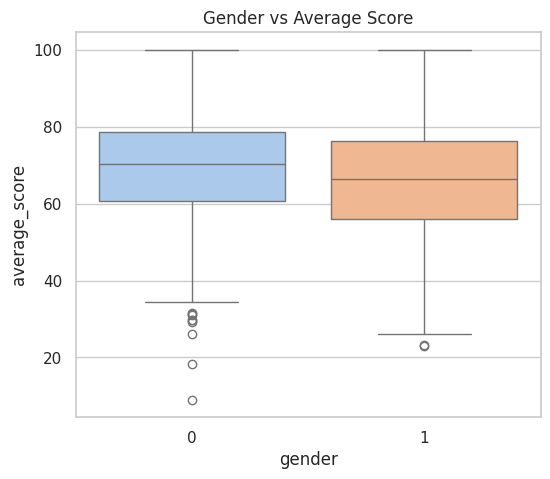

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='gender', y='average_score', data=df, palette='pastel')
plt.title('Gender vs Average Score')
plt.show()


/tmp/ipython-input-2076208423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y='average_score', data=df, palette='muted')


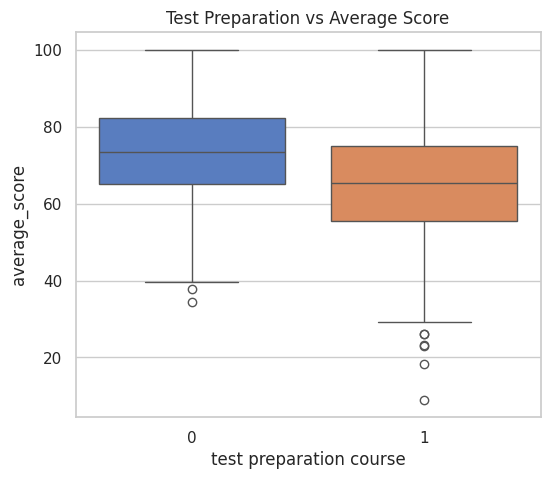

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='test preparation course', y='average_score', data=df, palette='muted')
plt.title('Test Preparation vs Average Score')
plt.show()



/tmp/ipython-input-3443283943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental level of education', y='average_score', data=df, palette='viridis')


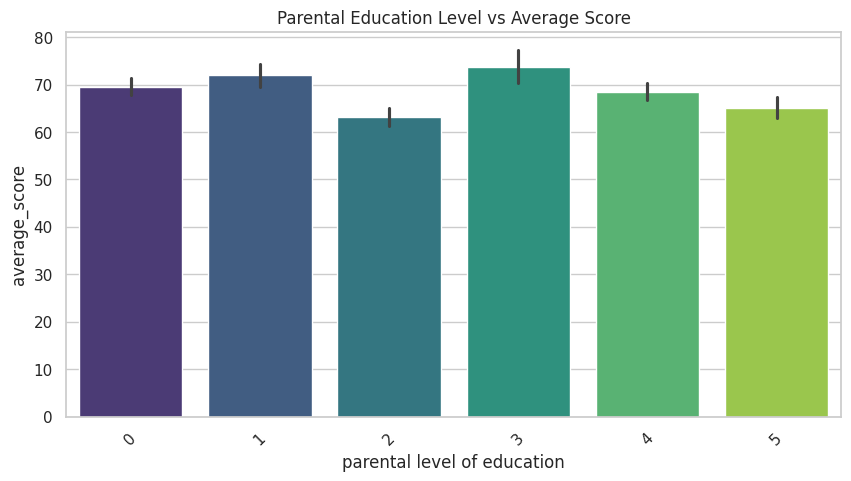

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='parental level of education', y='average_score', data=df, palette='viridis')
plt.title('Parental Education Level vs Average Score')
plt.xticks(rotation=45)
plt.show()


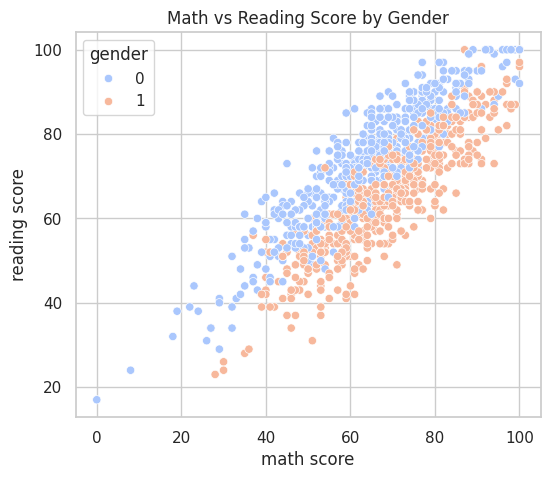

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='math score', y='reading score', data=df, hue='gender', palette='coolwarm')
plt.title('Math vs Reading Score by Gender')
plt.show()


/tmp/ipython-input-1635560835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='lunch', y='average_score', data=df, palette='Set2')


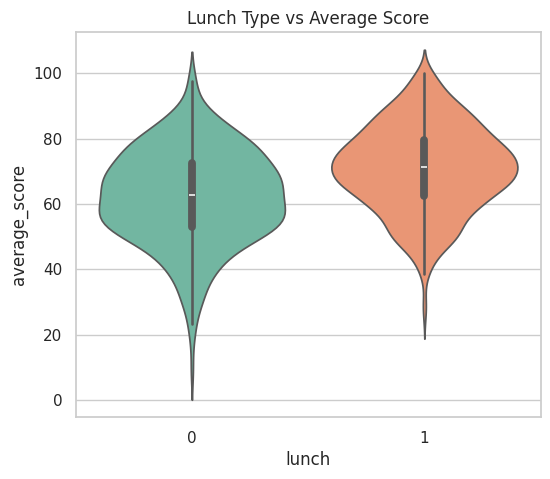

In [ ]:
plt.figure(figsize=(6,5))
sns.violinplot(x='lunch', y='average_score', data=df, palette='Set2')
plt.title('Lunch Type vs Average Score')
plt.show()


/tmp/ipython-input-3682820022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='test preparation course', data=df, palette='pastel')


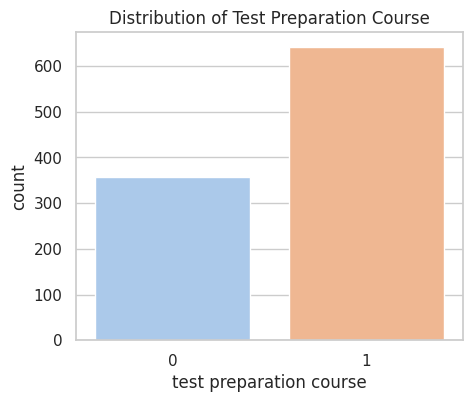

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='test preparation course', data=df, palette='pastel')
plt.title('Distribution of Test Preparation Course')
plt.show()


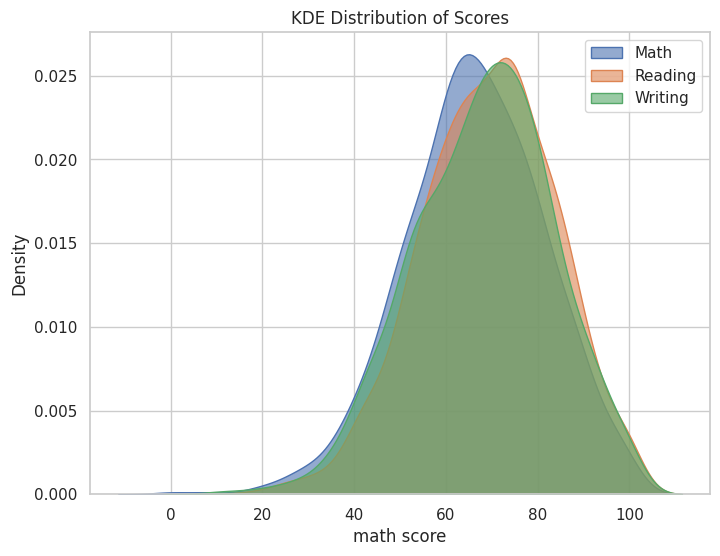

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['math score'], fill=True, label='Math', alpha=0.6)
sns.kdeplot(df['reading score'], fill=True, label='Reading', alpha=0.6)
sns.kdeplot(df['writing score'], fill=True, label='Writing', alpha=0.6)
plt.title('KDE Distribution of Scores')
plt.legend()
plt.show()


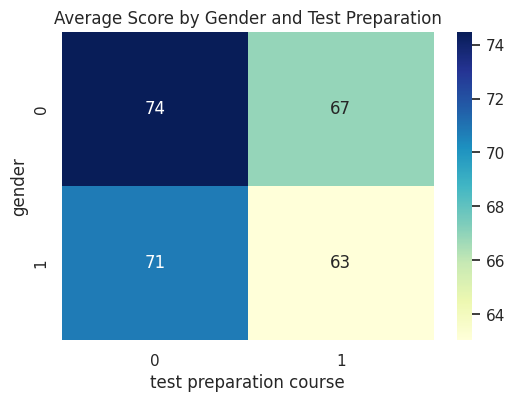

In [ ]:
cat_avg = df.groupby(['gender','test preparation course'])['average_score'].mean().unstack()
plt.figure(figsize=(6,4))
sns.heatmap(cat_avg, annot=True, cmap='YlGnBu')
plt.title('Average Score by Gender and Test Preparation')
plt.show()


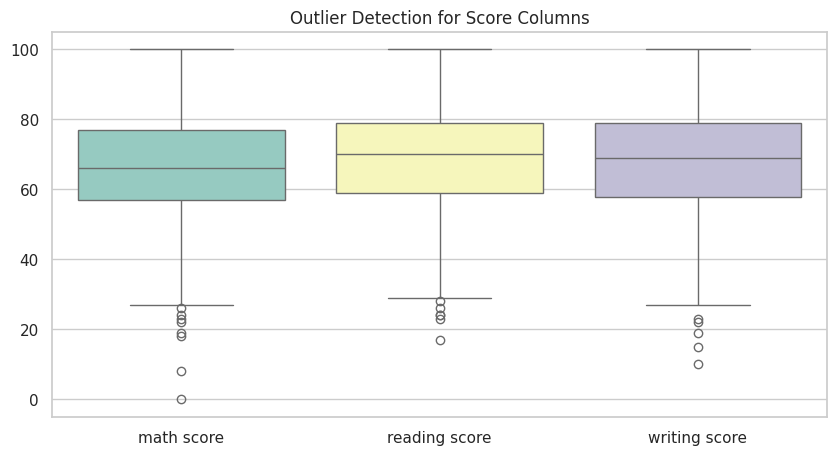

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['math score','reading score','writing score']], palette='Set3')
plt.title('Outlier Detection for Score Columns')
plt.show()


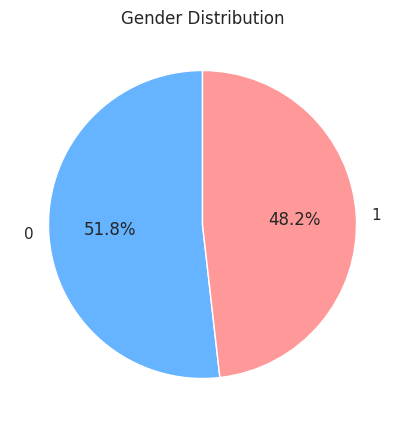

In [ ]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution')
plt.show()


In [ ]:
from tensorflow.keras import models, layers

# Define the model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 4697.1963 - mae: 67.0833 - val_loss: 4411.4395 - val_mae: 64.4259
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4534.6782 - mae: 65.8012 - val_loss: 3886.0017 - val_mae: 60.1970
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3858.4561 - mae: 60.5451 - val_loss: 2992.9131 - val_mae: 52.3068
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2834.9873 - mae: 51.2545 - val_loss: 1798.0913 - val_mae: 39.6395
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1573.7734 - mae: 36.7421 - val_loss: 732.3111 - val_mae: 23.9194
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 565.9307 - mae: 20.4128 - val_loss: 287.4065 - val_mae: 13.8089
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 241.7630 - mae: 12.7215 - val_loss: 248.2204 - val_mae: 12.0239
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 207.2290 - mae: 11.5788 - val_loss: 242.0116 - val_mae: 11.9394
Epoch 9/50
2

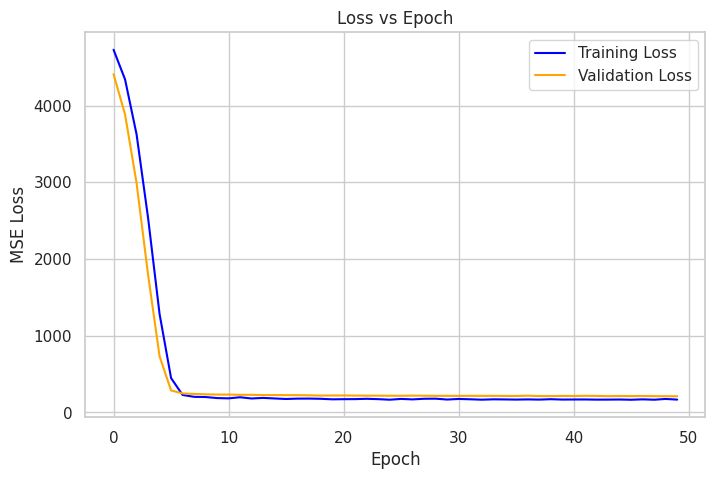

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


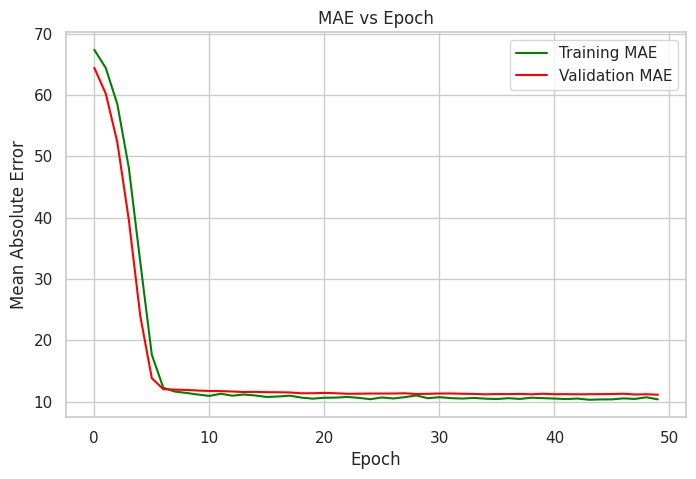

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Training MAE', color='green')
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
plt.title('MAE vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 190.5972 - mae: 11.6572
Test Loss (MSE): 180.43910217285156
Test MAE: 11.167586326599121
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


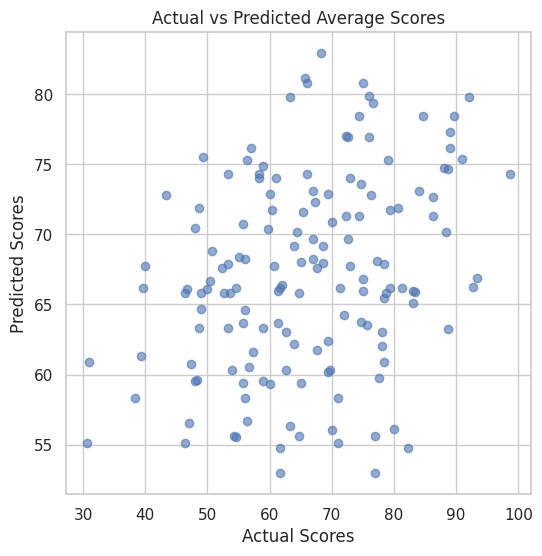

In [ ]:
# Evaluate on test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)

# Predictions
y_pred = model.predict(X_test)

# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Average Scores')
plt.show()


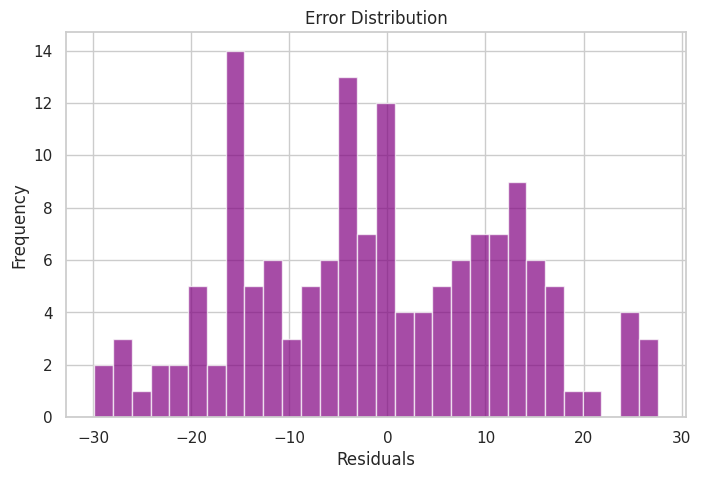

In [ ]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.title('Error Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


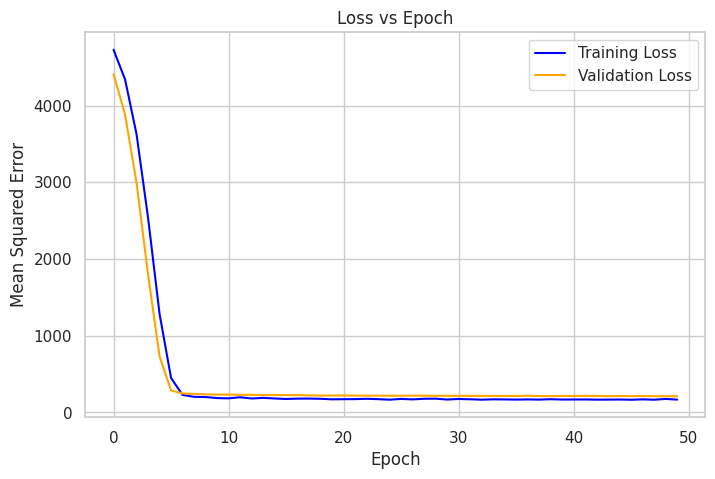

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


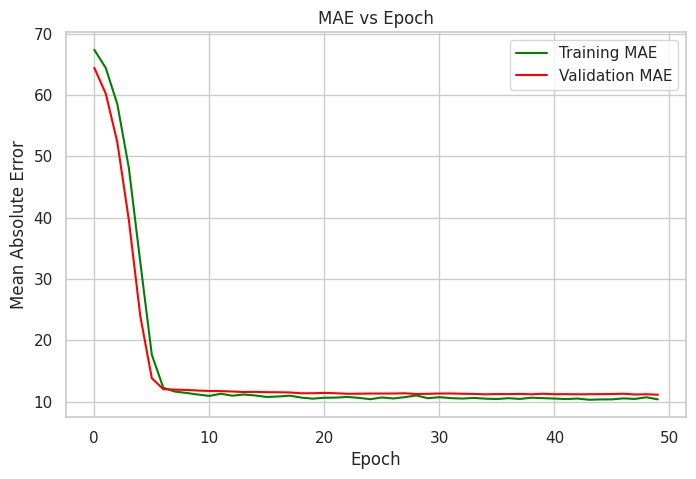

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Training MAE', color='green')
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
plt.title('MAE vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


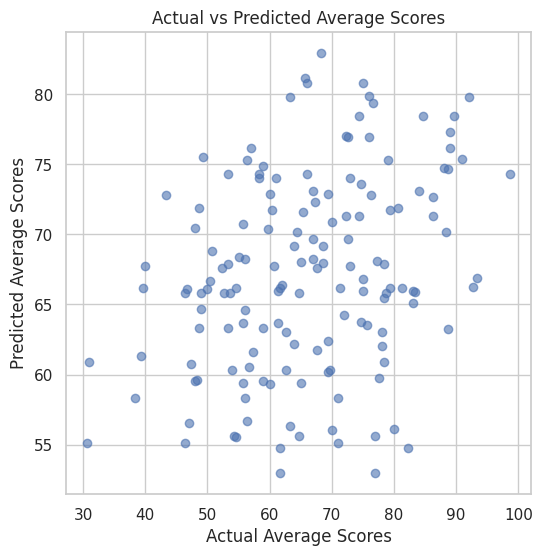

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Average Scores')
plt.ylabel('Predicted Average Scores')
plt.title('Actual vs Predicted Average Scores')
plt.show()


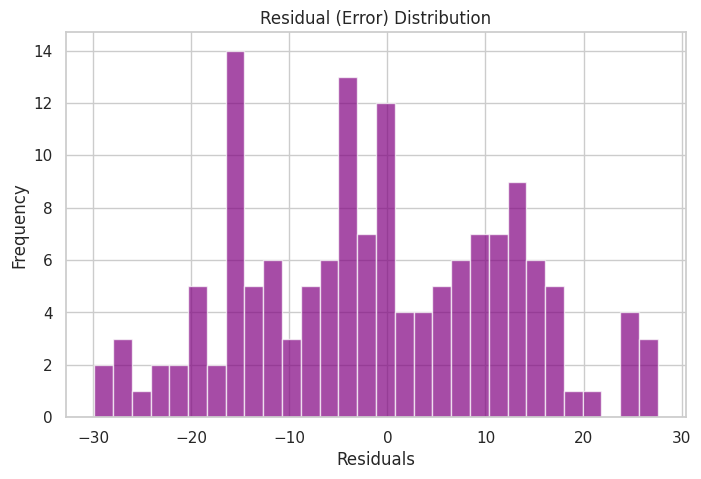

In [ ]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.title('Residual (Error) Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


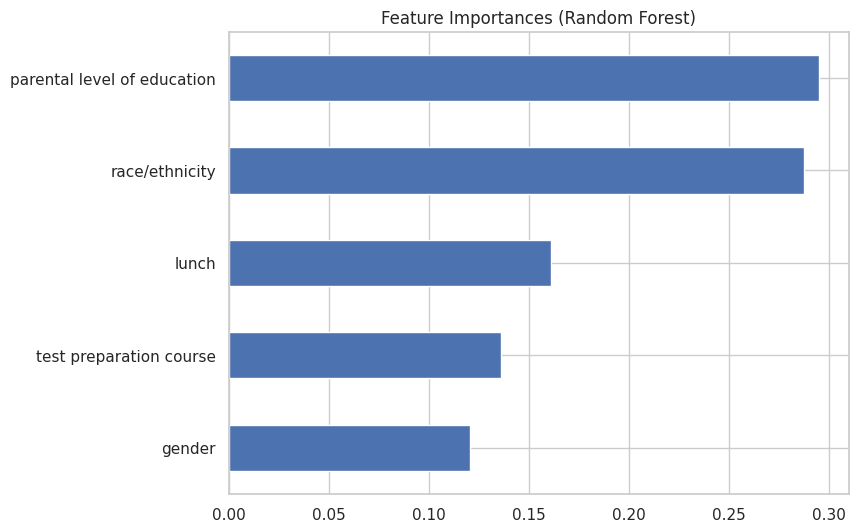

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
fi.plot(kind='barh', figsize=(8,6))
plt.title('Feature Importances (Random Forest)')
plt.show()
